# ***TMNIST - Character Recognition***


***Abstract:***
- The objective of this notebook is to understand the process of creating and training a simple Neural Network capable of classifying handwritten characters from the TMNIST Alphabet dataset, which consists of 94 different characters.

***Introduction:***
- The TMNIST Alphabet dataset comprises images of 94 different characters, each presented in a grayscale format of 28x28 pixels. With a total of 281,000 images, this dataset serves as a valuable resource for training and evaluating machine learning models focused on character recognition tasks.

- The characters included in the dataset range from alphanumeric characters ('0'-'9', 'a'-'z', 'A'-'Z') to special symbols ('!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '', ']', '^', '_', '`', '{', '|', '}', '~').

1. The dataset is provided in a single CSV file, where the first row contains column headers ('names', 'labels', '1', '2', ..., '784'). 
2. The 'names' column includes font file names, such as 'Acme-Regular' and 'ZillaSlab-Bold', while the 'labels' column contains the corresponding characters (e.g., '@', 'E', '+').
3. The remaining 784 columns store the grayscale pixel values for each image, representing the image of the respective character in the specified font style.

You can access the dataset and further details about it on Kaggle via the following link: ***https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters***

In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


# **Import Necessary Libraries & Dependencies:**

In [43]:
import warnings
warnings.filterwarnings("ignore")
 
# Import the necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
 
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist
import tensorflow as tf
 
sns.set(style='white', context='notebook', palette='deep')

# **Loading the Dataset:**

In [44]:
df = pd.read_csv('/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- The dataset consists of 5 rows and 786 columns, where each row represents an image of a character, and the 786 columns contain the pixel values of the grayscale image along with additional metadata.

In [45]:
print(f"The Shape of the Dataset is: {df.shape}")
print(f"The Number of Samples: {df.shape[0]}")
print(f"The Number of Features: {df.shape[1]}")

The Shape of the Dataset is: (274093, 786)
The Number of Samples: 274093
The Number of Features: 786


In [46]:
all_unique_chars = df['labels'].unique().tolist()
print(all_unique_chars)
 
num_of_unique_chars = len(df.labels.unique())
print('Length of unique characters: ',num_of_unique_chars)

['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=', 'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y', 'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X', '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0', '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S', 'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~', ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q', 'L', '!', '\\']
Length of unique characters:  94


# **Remove unnecessary columns from the dataset:**

In [47]:
X = df.drop(columns=['names','labels']).values
y = df[['labels']].values

In [48]:
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)

# **Examine the shape of dataset:**

In [49]:
print('Shape of Dataframe x: ',df_x.shape)
print('Shape of Dataframe y: ',df_y.shape)

Shape of Dataframe x:  (274093, 784)
Shape of Dataframe y:  (274093, 1)


# **EDA**

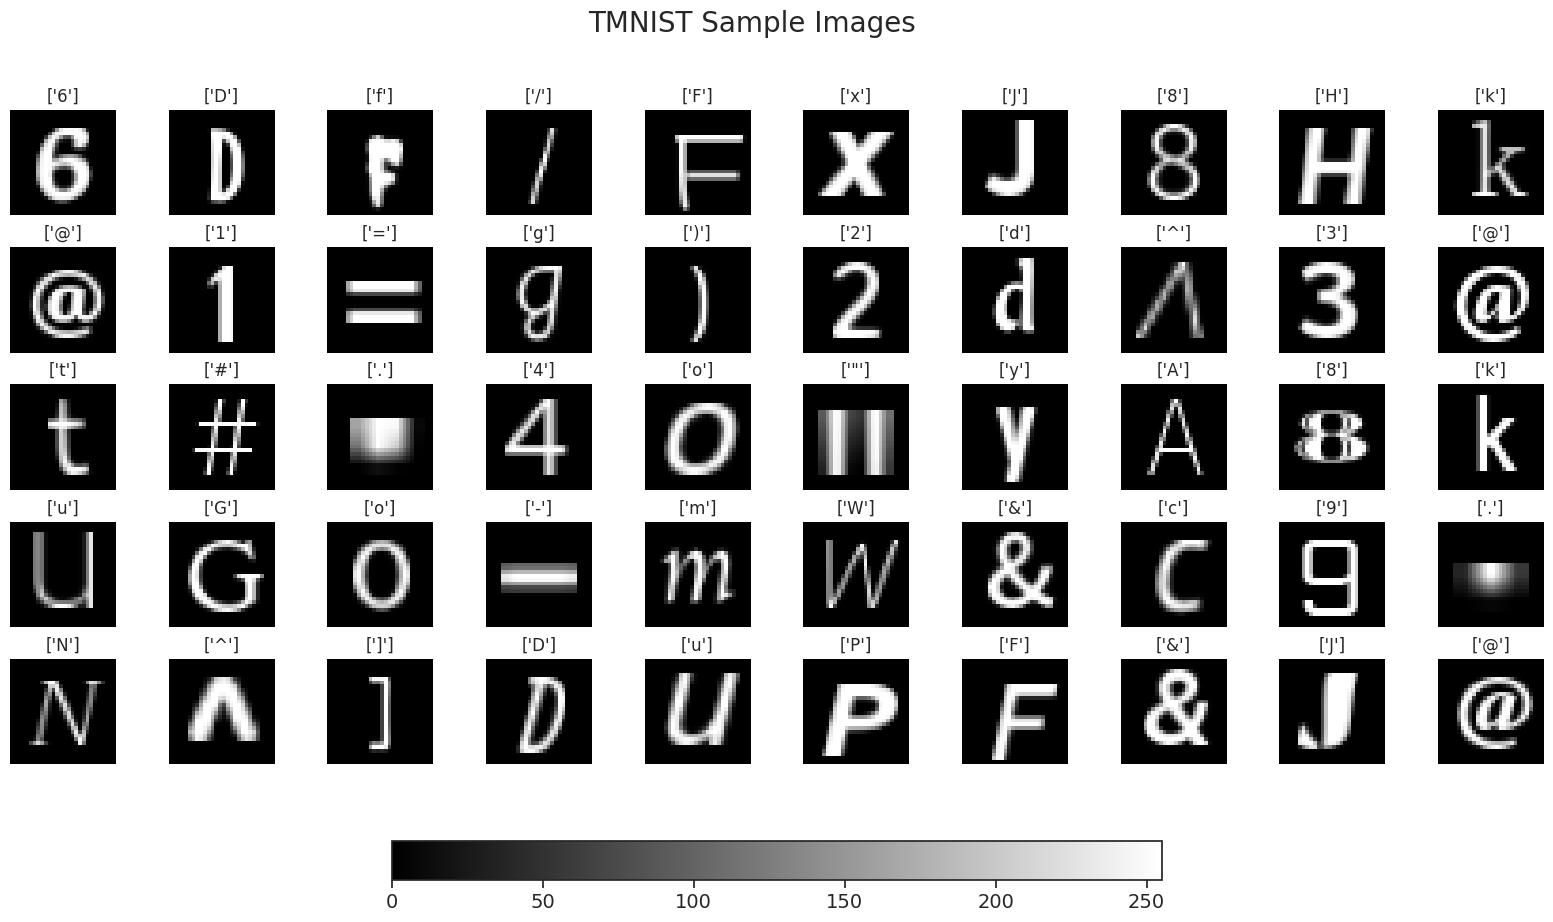

In [63]:
import matplotlib.pyplot as plt

X_pixels = X.reshape(-1, 28, 28)  # Reshape X to 28x28 images

fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(20, 10)) 
fig.suptitle("TMNIST Sample Images", fontsize=20)

for i, ax in enumerate(axes.flat):
    img = ax.imshow(X_pixels[i], cmap=plt.get_cmap('gray')) 
    ax.set_title(str(y[i]), fontsize=12)
    ax.axis('off')  # Remove axis ticks

plt.subplots_adjust(hspace=0.3, wspace=0.3)
cbar = fig.colorbar(img, ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.05, pad=0.1)
cbar.ax.tick_params(labelsize=14)

plt.show()


# **Splitting dataset in train and test sets:**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

In [65]:
print('X:Train, Test data shape: {}, {}'.format(X_train.shape, X_test.shape))
print('Y:Train, Test data shape: {}, {}'.format(y_train.shape, y_test.shape))

X:Train, Test data shape: (219274, 784), (54819, 784)
Y:Train, Test data shape: (219274, 1), (54819, 1)


# **Normalization:**

In [66]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# **One-Hot Encoding:**

In [67]:
from sklearn.preprocessing import OneHotEncoder
char_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_train_encoded = char_enc.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = char_enc.transform(y_test.values.reshape(-1, 1))

# **Reshaping:**

In [68]:
new_shape = (-1, 28, 28)
X_train_norm = np.reshape(X_train.values, new_shape)
X_test_norm = np.reshape(X_test.values, new_shape)

# CNN Squential Model -

1. Convolutional Layers: These layers apply convolution operations using learnable filters to extract specific features like edges, textures, or shapes from input images. By capturing local spatial patterns, they enable the network to learn hierarchical representations of the input.

2. Pooling Layers: These layers downsample feature maps from convolutional layers, commonly using max pooling to extract the highest values from fixed-size windows. By reducing spatial dimensions, they enhance computational efficiency and mitigate overfitting risks.

3. Activation Functions: Activation functions introduce non-linearity, enabling the network to learn intricate patterns. Common functions like ReLU replace negative values with zero, while softmax normalizes outputs into probability distributions across multiple classes.

4. Fully Connected Layers: Positioned at the end of CNN architectures, fully connected layers connect every neuron in one layer to those in the next. They facilitate classification or regression tasks by learning intricate data representations.

5. Batch Normalization: This technique stabilizes and accelerates deep neural network training by normalizing layer activations. Adjusting and scaling inputs to activation functions, it prevents gradient issues and expedites convergence.

![Image - Convolution Neural Network](https://miro.medium.com/v2/resize:fit:1400/1*SGPGG7oeSvVlV5sOSQ2iZw.png)

In [69]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
 
callback = EarlyStopping(monitor='loss', patience=3)
 
cnn_model = Sequential([
    Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_of_unique_chars, activation='softmax')
])
 
opt = Adam()
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 94)             │         3,102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,766 (721.74 KB)

 Trainable params: 184,766 (721.74 KB)

 Non-trainable params: 0 (0.00 B)

# **Model Fitting:**

In [70]:
model_history = cnn_model.fit(X_train_norm, y_train_encoded, epochs=5, validation_data=(X_test_norm, y_test_encoded), callbacks=[callback], verbose=1, batch_size=128)

Epoch 1/5
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 315s 182ms/step - accuracy: 0.6574 - loss: 1.3754 - val_accuracy: 0.8627 - val_loss: 0.4300
Epoch 2/5
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 307s 174ms/step - accuracy: 0.8770 - loss: 0.3910 - val_accuracy: 0.9051 - val_loss: 0.3103
Epoch 3/5
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 331s 179ms/step - accuracy: 0.9093 - loss: 0.2899 - val_accuracy: 0.9129 - val_loss: 0.2777
Epoch 4/5
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 310s 172ms/step - accuracy: 0.9243 - loss: 0.2397 - val_accuracy: 0.9211 - val_loss: 0.2498
Epoch 5/5
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 296s 173ms/step - accuracy: 0.9308 - loss: 0.2145 - val_accuracy: 0.9269 - val_loss: 0.2376


* The model_new.fit() function trains our model by exposing it to the dataset for a number of rounds equivalent to a generation's worth of years, fine-tuning the model's parameters to reduce the chosen loss. Once training is complete, it provides us with a historical record containing key metrics from each training session, which we can use to evaluate and understand how well our model is learning over time.

**Key Parameters:**
* *Training Data:* The model is trained using X_train_norm, which represents the normalized training images, as input features, while y_train_encoded, denoting the one-hot encoded class labels, serves as the target outputs.

* *Epochs (epochs=10):* This parameter determines the number of complete passes through the entire training dataset. Each epoch provides the model with additional learning opportunities. However, employing excessive epochs may result in overfitting unless monitored carefully.

* *Validation Data (validation_data=(X_test_norm, y_test_encoded)):* Apart from the training data, the model is evaluated on a distinct dataset, not encountered during training. This evaluation occurs at the conclusion of each epoch, offering insights into the model's generalization capabilities on unseen data.

* *Verbose (verbose=1)*: This parameter dictates the verbosity level of the training process output. When set to 1, the method prints a concise summary per epoch, including details such as the epoch number, training loss, training accuracy, validation loss, and validation accuracy.

* *Batch Size (batch_size=128):* It defines the number of samples utilized per gradient update during training. Smaller batch sizes consume less memory and may induce a regularization effect, potentially enhancing the model's generalization ability. However, they might lead to slower convergence rates. A batch size of 128 is commonly chosen as it strikes a balance between these considerations.

* Callbacks: Utilizes the callback object, typically an instance of EarlyStopping, to monitor training and potentially interrupt it if certain conditions are met, such as no improvement in validation loss after a specified number of epochs.

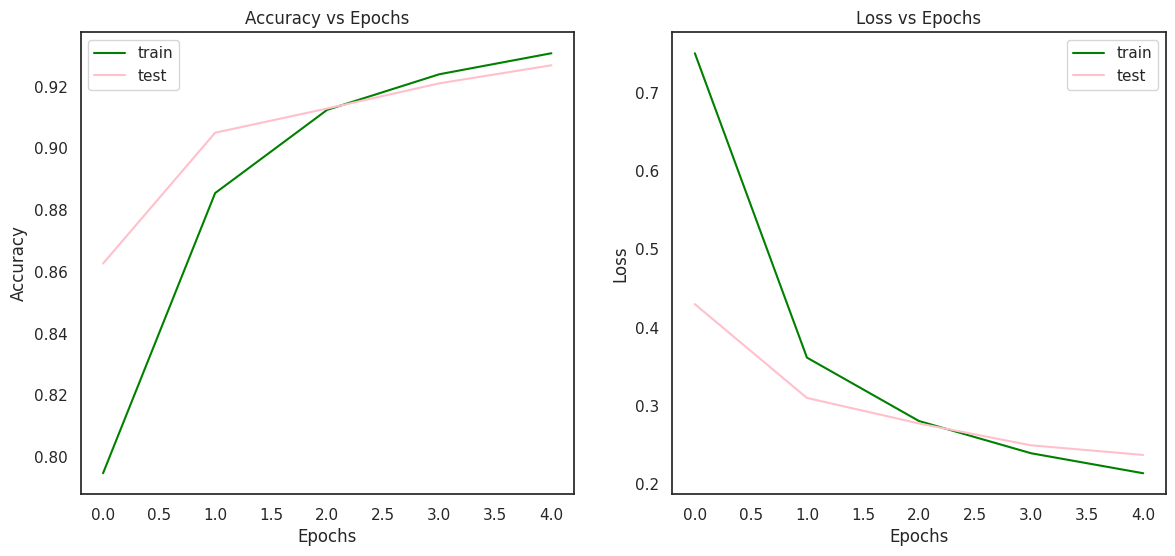

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
 
epochs = np.arange(5)
 
# Plot accuracy vs epochs
axs[0].set_title('Accuracy vs Epochs')
axs[0].plot(epochs, model_history.history['accuracy'], color='green', label='train')
axs[0].plot(epochs, model_history.history['val_accuracy'], color='pink', label='test')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
 
# Plot loss vs epochs
axs[1].set_title('Loss vs Epochs')
axs[1].plot(epochs, model_history.history['loss'], color='green', label='train')
axs[1].plot(epochs, model_history.history['val_loss'], color='pink', label='test')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()

***Model Accuracy Plot:***

- X-axis: Number of epochs or training iterations
- Y-axis: Model accuracy
- Two lines: Training accuracy and validation accuracy
- Training accuracy: Shows performance on training data, should increase over epochs
- Validation accuracy: Indicates generalization to unseen data, ideally also increasing and converging with training accuracy

***Model Loss Plot:***

- X-axis: Number of epochs or training iterations
- Y-axis: Model loss
- Two lines: Training loss and validation loss
- Training loss: Represents error on training data, should decrease over epochs
- Validation loss: Reflects generalization to unseen data, ideally also decreasing and converging with training loss

In [73]:
predictions = cnn_model.predict(X_test_norm)
 
# Converting one-hot encoded predictions to actual labels
predicted_labels = char_enc.inverse_transform(predictions)
 
# Converting actual one-hot encoded labels to actual labels
actual_labels = char_enc.inverse_transform(y_test_encoded)
 
# Printing predictions and actual labels
for i in range(10):
    print(f"Predicted: {predicted_labels[i][0]}, Actual: {actual_labels[i][0]}")

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step
Predicted: I, Actual: I
Predicted: 3, Actual: 3
Predicted: &, Actual: &
Predicted: j, Actual: j
Predicted: E, Actual: E
Predicted: k, Actual: k
Predicted: ', Actual: '
Predicted: I, Actual: I
Predicted: V, Actual: V
Predicted: j, Actual: j


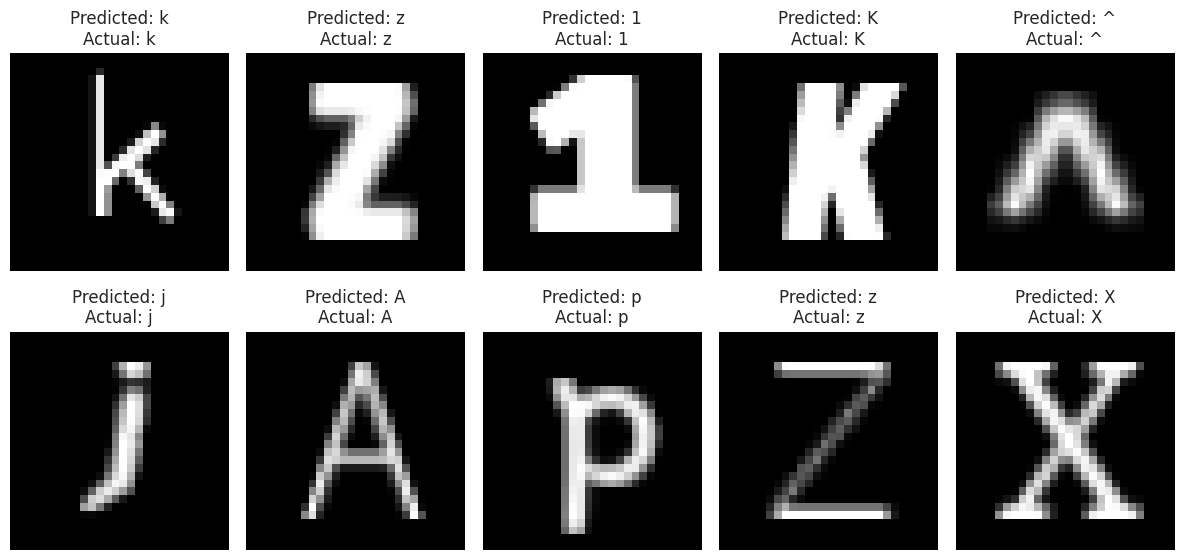

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Shuffling the indices for randomization
indices = np.random.permutation(len(X_test_norm))

# Plotting shuffled predictions and their corresponding images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    idx = indices[i]
    plt.imshow(X_test_norm[idx], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[idx][0]}\nActual: {actual_labels[idx][0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Conclusion:**

- In summary, the TMNIST project demonstrates the advancements in character recognition within the machine learning domain. - By leveraging convolutional neural networks (CNNs) and careful preprocessing techniques, we successfully trained models to accurately identify handwritten characters from the TMNIST dataset. 
- The utilization of CNNs allowed for effective feature extraction and hierarchical pattern recognition, essential for accurate classification. Additionally, fine-tuning hyperparameters and optimizing model architectures played a crucial role in achieving high performance. 
- This technical endeavor highlights the importance of algorithmic sophistication, data preprocessing, and model optimization in developing robust machine learning solutions for character recognition tasks.

## **REFERENCES**
- *Keras Documentation* - https://keras.io/api/layers/convolution_layers/
- *TensorFlow Documentation* - https://www.tensorflow.org/guide/intro_to_modules
- *Pandas Documentation* - https://pandas.pydata.org/docs/
- *Matplotlib Documentation* - https://matplotlib.org/
- *Scikit-Learn Documentation* - https://scikit-learn.org/stable/
- *Kaggle Notebook* - https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy/notebook

# **LICENSE**

MIT License

Copyright (c) 2024 ckulkarni13

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.